## Replication of Adam Symington's Article:
## Creating Beautiful Population Density Maps with Python
https://towardsdatascience.com/creating-beautiful-population-density-maps-with-python-fcdd84035e06

---

downloaded data from [here](https://ghsl.jrc.ec.europa.eu/download.php?ds=pop), the 30 arcsec resolution, with WGS84 coordinate system and the population projection for 2030.

In [2]:
import rasterio

tif_file = rasterio.open('/Users/nf/Downloads/GHS_POP_E2030_GLOBE_R2023A_4326_30ss_V1_0/GHS_POP_E2030_GLOBE_R2023A_4326_30ss_V1_0.tif')
ghs_data = tif_file.read()

get a feeling for the data:

In [3]:
import numpy as np

print("Tiff Boundary", tif_file.bounds)
print("Tiff CRS", tif_file.crs)
print("Data shape", ghs_data.shape)
print("Max value", np.amax(ghs_data))
print("Min value", np.amin(ghs_data))

Tiff Boundary BoundingBox(left=-180.00791593130032, bottom=-89.10041610517152, right=180.00874930942342, top=89.0995831776456)
Tiff CRS EPSG:4326
Data shape (1, 21384, 43202)
Max value 394367.2599414062
Min value 0.0


In [ ]:
# set every value below zero (=missings) to zero. (Is this even necessary, still?)

In [5]:
# ghs_data[0][ghs_data[0] < 0.0] = 0.0

create a fancy colourmap...

In [4]:
from matplotlib import cm
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap, ListedColormap

ourcmap = cm.get_cmap('hot_r', 460)
newcolors = ourcmap(np.linspace(0, 1, 460))
background_colour = np.array([0.9882352941176471, 0.9647058823529412, 0.9607843137254902, 1.0])
newcolors[:1, :] = background_colour
newcmp = ListedColormap(newcolors)

... and plot it (may take a while)

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

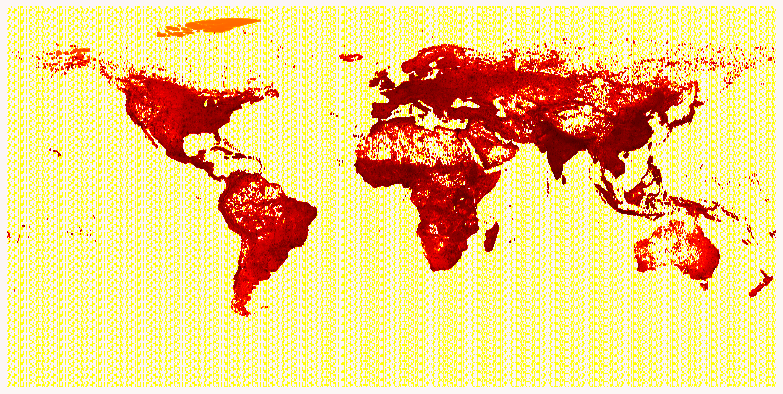

In [7]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(ghs_data[0], norm=colors.LogNorm(), cmap=newcmp)
ax.axis('off')
plt.show()

a better colourmap...

In [7]:
our_cmap = cm.get_cmap('hot_r', 10)
newcolors = our_cmap(np.linspace(0, 1, 10))
background_colour = np.array([0.9882352941176471, 0.9647058823529412, 0.9607843137254902, 1.0])
newcolors = np.vstack((background_colour, newcolors))
our_cmap = ListedColormap(newcolors)
bounds = [0.0, 1, 5, 10, 20, 50, 100, 200, 1000, 2000, 10000]
norm = colors.BoundaryNorm(bounds, our_cmap.N)

... and plotted it looks like this:

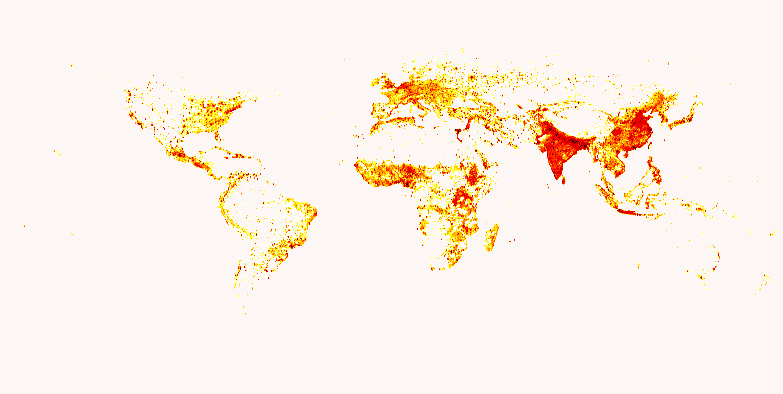

In [8]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(ghs_data[0], norm=norm, cmap=our_cmap)
ax.axis('off')
plt.show()

---

get Western European country shapefiles from [NaturalEarth](https://www.naturalearthdata.com/)  <br> from countries with overseas territories, take only the European territories

In [12]:
import geopandas as gpd
import pandas as pd

df = gpd.read_file('/Users/nf/Downloads/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
western_europe = df.loc[df['ADMIN'].isin(['United Kingdom', 'Germany', 'Austria', 'Czechia',
                                              'Italy', 'Denmark', 'Luxembourg',
                                              'Belgium', 'Switzerland', 'Ireland'])]
# france = df.loc[df['ADMIN'] == 'France']
# Polygons = list(france.iloc[0].geometry)
# france.geometry = [Polygons[1]]

# spain = df.loc[df['ADMIN'] == 'Spain']
# Polygons = list(spain.iloc[0].geometry)
# spain.geometry = [Polygons[2]]

# netherlands = df.loc[df['ADMIN'] == 'Netherlands']
# Polygons = list(netherlands.iloc[0].geometry)
# netherlands.geometry = [Polygons[0]]


# portugal = df.loc[df['ADMIN'] == 'Portugal']
# Polygons = list(portugal.iloc[0].geometry)
# portugal.geometry = [Polygons[0]]

# western_europe = pd.concat([western_europe, france, spain, netherlands, portugal])

show the population forecast for only the selected countries (shapefiles) using the mask function

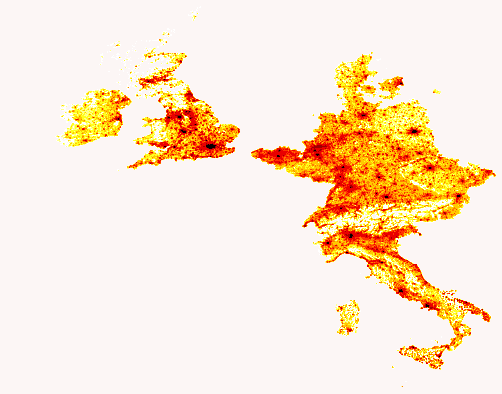

In [13]:
from shapely.geometry import mapping
from rasterio import mask as msk

europe_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in western_europe.geometry.tolist()], crop=True)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(europe_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')
plt.show()